In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data_dir = pathlib.Path('/content/gdrive/My Drive/dataset/dataset')

In [9]:
# wav list
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
# one example from the list
audio = filenames[0]
print(audio)
# play audio
ipd.Audio(audio)

/content/gdrive/My Drive/dataset/dataset/Brushing/B_CAN01_EU_FN_GIA01_205.wav


/content/gdrive/My Drive/dataset/dataset/Brushing/B_CAN01_EU_FN_GIA01_205.wav


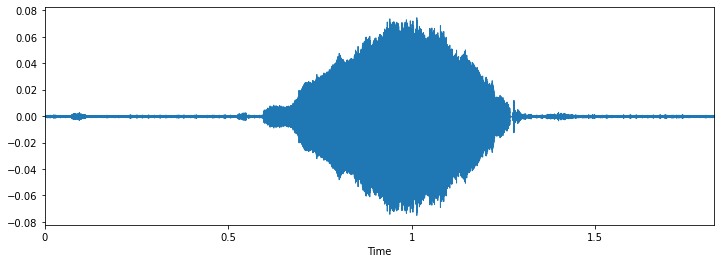

In [13]:
# load the wav
data, sampling_rate = librosa.load(audio)
# visualize the wav
print(audio)
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

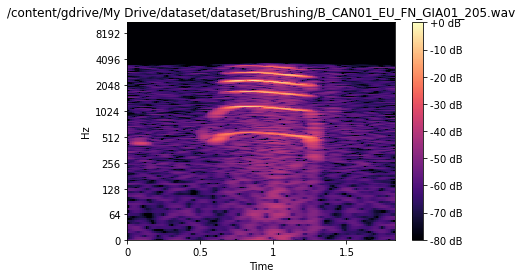

In [55]:
# load the wav file
data, sr = librosa.load(audio)
fig, ax = plt.subplots()
D_highres = librosa.stft(data, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)
# set title
ax.set(title=audio)
fig.colorbar(img, ax=ax, format="%+2.f dB")